# Atividade 3 - Matheus Inácio Silva Mol

- Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;
- Treine um modelo da classe LinearRegression do scikit-learn com toda a base;
- Calcule o MSE (erro quadrático médio) para todos os exemplos da base usada como treino no modelo treinado (resubstituição);
- Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

#### Base de Dados Relacionando umidade e temperatura: [DOWNLOAD](https://www.kaggle.com/code/rtatman/datasets-for-regression-analysis/notebook)

#### Importar Bibliotecas

In [1]:
from sklearn.linear_model import LinearRegression  # Modelo para regressão Linear
from sklearn.metrics import mean_squared_error     # Modelo para  erro
import matplotlib.pyplot as plt                    # Biblioteca para plotar Gráficos
import pandas as pd                                # Biblioteca para apresentar dataframes
import numpy as np                                 # Biblioteca para números aleatórios

##### Base de dados:

In [2]:
df = pd.read_csv('C:\Github - Repositórios\REPA\weatherHistory.csv') # Leitura do arquivo GSD com os dados

df.head(5) # Apresenta os 5 primeiras colunas da base de dados no Dataframe

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


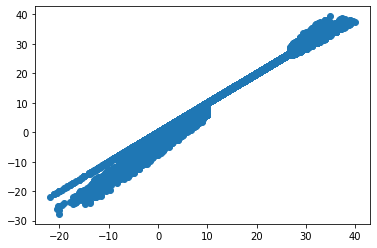

In [3]:
X = df["Temperature (C)"].values # Valores para X correspondem a Temperatura
y = df["Apparent Temperature (C)"].values # Valores para y correspondem a Temperatura aparente

plt.scatter(X,y)
plt.show()


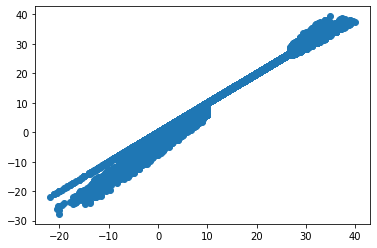

In [4]:
X2 = X.reshape(-1,1)
y2 = y.reshape(-1,1)

plt.scatter(X2, y2) # Pega todas as linhas da coluna 0 ()
plt.show()

##### Modelo Regressão Linear

In [5]:
modelo = LinearRegression()
modelo.fit(X2,y2)

LinearRegression()

In [6]:
DELTA = 1 # O valor do delta pode ser ajustado
ITERAÇÕES = 30 # A quantidade de iterações pode ser alterado
INTERCEPT = modelo.intercept_ # corresponde a variável w

lista_intersept = np.linspace(INTERCEPT+DELTA, INTERCEPT-DELTA, ITERAÇÕES) # Gera a lista de pesos para cada iteração
lista_intersept

array([[-1.40995785],
       [-1.47892337],
       [-1.54788888],
       [-1.6168544 ],
       [-1.68581992],
       [-1.75478543],
       [-1.82375095],
       [-1.89271647],
       [-1.96168199],
       [-2.0306475 ],
       [-2.09961302],
       [-2.16857854],
       [-2.23754405],
       [-2.30650957],
       [-2.37547509],
       [-2.44444061],
       [-2.51340612],
       [-2.58237164],
       [-2.65133716],
       [-2.72030268],
       [-2.78926819],
       [-2.85823371],
       [-2.92719923],
       [-2.99616474],
       [-3.06513026],
       [-3.13409578],
       [-3.2030613 ],
       [-3.27202681],
       [-3.34099233],
       [-3.40995785]])

##### Calculo do erro médio

In [7]:
lista_mse = [] # Gera uma lista de erros para cara intercept

for v in range(ITERAÇÕES): # para cada iteração deve ser calculado o erro médio e adicionado em uma lista
    modelo.intercept_ = lista_intersept[v]
    ypred = modelo.predict(X2)
    mse = mean_squared_error(y, ypred)
    lista_mse.append(mse)

print(lista_mse) # Apresenta a lista de erro médio gerado    

[2.680681953258284, 2.547507161343897, 2.4238448545662497, 2.309695032925347, 2.2050576964211843, 2.1099328450537658, 2.024320478823087, 1.9482205977291505, 1.8816332017719566, 1.8245582909515052, 1.7769958652677955, 1.738945924720827, 1.7104084693106008, 1.6913834990371164, 1.681871013900375, 1.6818710139003743, 1.6913834990371166, 1.7104084693106, 1.738945924720826, 1.7769958652677937, 1.824558290951503, 1.8816332017719553, 1.9482205977291487, 2.024320478823084, 2.1099328450537618, 2.2050576964211808, 2.3096950329253434, 2.4238448545662457, 2.547507161343893, 2.680681953258279]


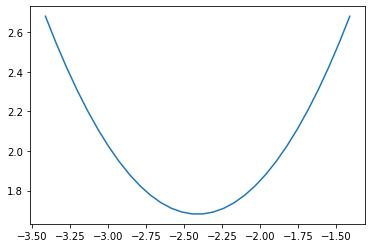

In [8]:
# Plota o Gráfico final
plt.plot(lista_intersept,lista_mse)
plt.show()